In [1]:
% matplotlib inline

import pandas as pd, numpy as np, nibabel as nib
import seaborn as sns
import matplotlib.pyplot as plt
import utils.plotting_lighterbg as plot

sns.set_style('white')
sns.set_context('talk')

/home/raid3/oligschlager/anaconda2/envs/distconnect/lib/python2.7/site-packages/nibabel/cifti2/parse_cifti2.py:24: FutureWarning: We no longer carry a copy of the 'six' package in nibabel; Please import the 'six' package directly
  from ..externals.six import BytesIO


In [2]:
data_dir = '/home/raid3/oligschlager/workspace/tractdist/data'
yerkes_dir ='/nobackup/hunte1/sabine/data/macaque/Yerkes19'


# macaque surface for viz
f_surf = '%s/Donahue_et_al_2016_Journal_of_Neuroscience_W336/spec/MacaqueYerkes19.L.inflated.32k_fs_LR.surf.gii' % yerkes_dir
coords = nib.load(f_surf).darrays[0].data
faces = nib.load(f_surf).darrays[1].data
surf = tuple((coords, faces))
f_sulc = '%s/Donahue_et_al_2016_Journal_of_Neuroscience_W336/spec/MacaqueYerkes19.sulc.32k_fs_LR.dscalar.nii' % yerkes_dir
sulc = nib.load(f_sulc).get_data().squeeze()[:32492]


# macaque surface for dist
f_surf_mid = '%s/Donahue_et_al_2016_Journal_of_Neuroscience_W336/spec/MacaqueYerkes19.L.midthickness.32k_fs_LR.surf.gii' % yerkes_dir
coords_mid = nib.load(f_surf_mid).darrays[0].data
faces_mid = nib.load(f_surf_mid).darrays[1].data
surf_mid = tuple((coords_mid, faces_mid))



# labels
mwall = np.load('%s/medial_wall.lh.label.npy' % yerkes_dir)
cort = np.array([node for node in range(32492) if node not in mwall])
areas_f = '%s/Donahue_et_al_2016_Journal_of_Neuroscience_W336/data/MarkovCC12_M132_91-area.32k_fs_LR.dlabel.nii' % yerkes_dir
areas_annot = nib.load(areas_f).get_data().squeeze()[:28261]
areas_key = np.load('/nobackup/hunte1/sabine/data/macaque/Yerkes19/M132_key.npy')


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [3]:
import gdist
from surfdist.utils import surf_keep_cortex, translate_src, recort

vertices, triangles = surf_keep_cortex(surf, cort)

def dist_calc_fast(src, cortex, vertices, triangles, surf):
    src_new = translate_src(src, cortex)
    data = gdist.compute_gdist(vertices, triangles, source_indices=src_new)
    dist = recort(data, surf, cortex)
    del data
    return dist

In [26]:
excl_areas = ['9', '10', '11', '12', '13']#['9_46d', '9_46v', '46d', '46v']

In [21]:
mask = list()
for ba in excl_areas:
    mask.extend(np.where(areas_annot == np.where(areas_key == ba)[0])[0])

In [23]:
mask.sort()

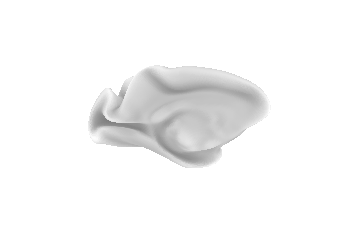

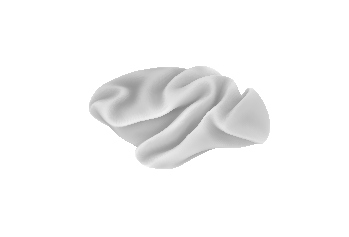

In [25]:
for azim in [0, 180]:
    img = plot.plot_surf_stat_map(coords, faces,
                                  mask=mask,
                                  #labels = labels, 
                                  azim=azim,
                                  bg_map=sulc, bg_on_stat=True, cmap='CMRmap')

### Old: procedure as in the human analysis

In [4]:
nodes_vis = cort[np.where(areas_annot == np.where(areas_key == 'V1')[0])]
nodes_soma = cort[np.where(areas_annot == np.where(areas_key == '3')[0])]
nodes_mot = cort[np.where(areas_annot == np.where(areas_key == 'F1')[0])]
nodes_aud = cort[np.where(areas_annot == np.where(areas_key == 'Core')[0])]

In [5]:
# get labels per modality
dist_vis = dist_calc_fast(nodes_vis, cort, vertices, triangles, surf_mid)
dist_soma = dist_calc_fast(nodes_soma, cort, vertices, triangles, surf_mid)
dist_mot = dist_calc_fast(nodes_mot, cort, vertices, triangles, surf_mid)
dist_aud = dist_calc_fast(nodes_aud, cort, vertices, triangles, surf_mid)

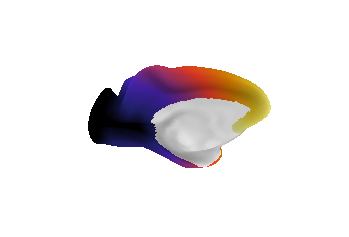

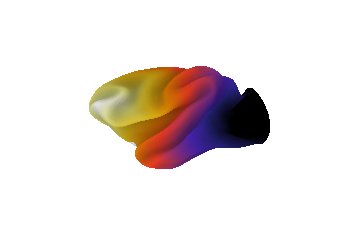

In [6]:
for azim in [0, 180]:
    img = plot.plot_surf_stat_map(coords, faces,
                                  dist_vis, mask=cort,
                                  #labels = labels, 
                                  azim=azim,
                                  bg_map=sulc, bg_on_stat=True, cmap='CMRmap')

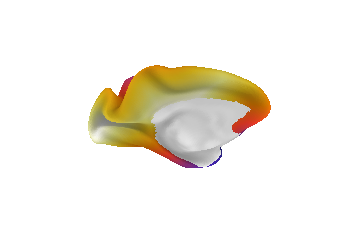

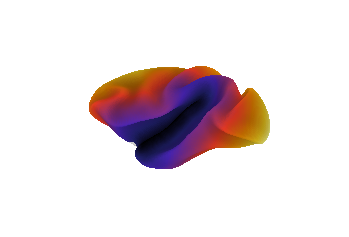

In [7]:
for azim in [0, 180]:
    img = plot.plot_surf_stat_map(coords, faces,
                                  dist_aud, mask=cort,
                                  #labels = labels, 
                                  azim=azim,
                                  bg_map=sulc, bg_on_stat=True, cmap='CMRmap')

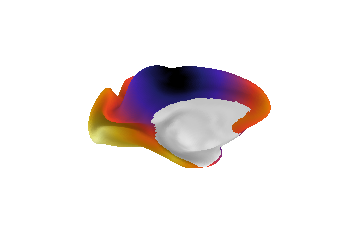

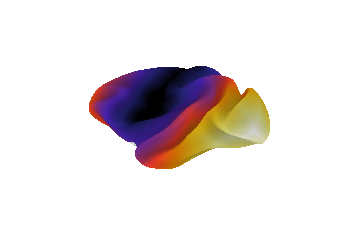

In [8]:
for azim in [0, 180]:
    img = plot.plot_surf_stat_map(coords, faces,
                                  dist_soma, mask=cort,
                                  #labels = labels, 
                                  azim=azim,
                                  bg_map=sulc, bg_on_stat=True, cmap='CMRmap')

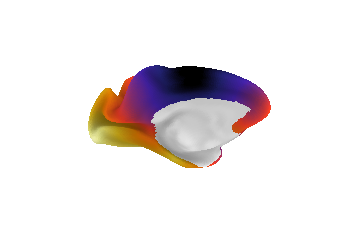

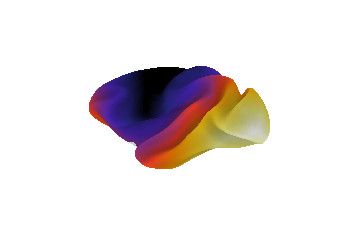

In [9]:
for azim in [0, 180]:
    img = plot.plot_surf_stat_map(coords, faces,
                                  dist_mot, mask=cort,
                                  #labels = labels, 
                                  azim=azim,
                                  bg_map=sulc, bg_on_stat=True, cmap='CMRmap')

In [10]:
# zones
closest_modality = np.argmin(np.vstack((dist_vis, dist_aud, dist_soma, dist_mot)), axis=0)
closest_modality[cort] += 1


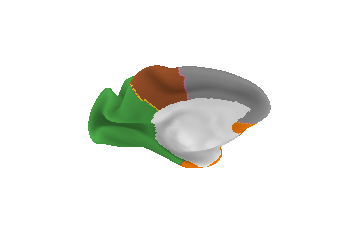

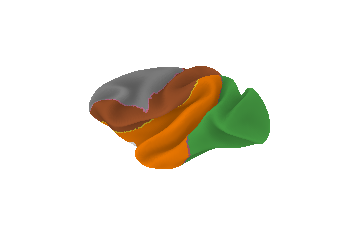

In [11]:
for azim in [0, 180]:
    img = plot.plot_surf_stat_map(coords, faces,
                                  closest_modality, mask=cort,
                                  #labels = labels, 
                                  azim=azim,
                                  bg_map=sulc, bg_on_stat=True, cmap='Set1')

In [12]:
min_dist = np.min(np.vstack((dist_vis, dist_aud, dist_soma, dist_mot)), axis=0)

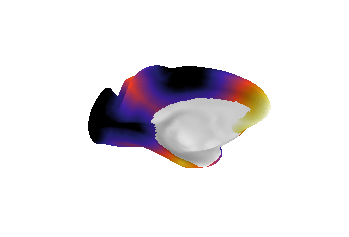

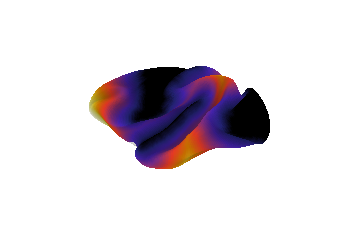

In [13]:
for azim in [0, 180]:
    img = plot.plot_surf_stat_map(coords, faces,
                                  min_dist, mask=cort,
                                  #labels = labels, 
                                  azim=azim,
                                  bg_map=sulc, bg_on_stat=True, cmap='CMRmap')

In [14]:
cutoff = min_dist[closest_modality == 1].max()
mask = cort[np.where(min_dist[cort] <= cutoff)[0]]

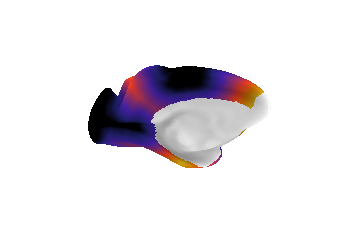

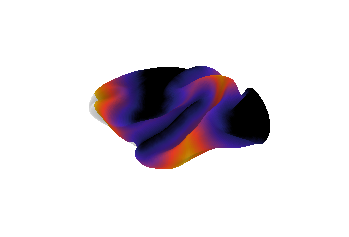

In [15]:
for azim in [0, 180]:
    img = plot.plot_surf_stat_map(coords, faces,
                                  min_dist, mask=mask,
                                  #labels = labels, 
                                  azim=azim,
                                  bg_map=sulc, bg_on_stat=True, cmap='CMRmap')

In [16]:
print cutoff

23.4193638603


In [17]:
df_r = pd.read_pickle('/home/raid3/oligschlager/workspace/tractdist/data/df_regionwise.pkl')

In [18]:
df_r['PFC_excluded'] = np.nan

for i in df_r.index:
    
    df_r['PFC_excluded'].iloc[i] = 0 
    if type(df_r['injection sites'].iloc[i]) is list:
        
        inj_nodes = df_r['injection sites'].iloc[i]
        
        if len(set(inj_nodes).intersection(mask)) == 0:
            print df_r.area.iloc[i]
            
        else:
            df_r['PFC_excluded'].iloc[i] = 1 

/home/raid3/oligschlager/anaconda2/envs/distconnect/lib/python2.7/site-packages/pandas/core/indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


46d
24c
10


In [19]:
import statsmodels.formula.api as smf
from scipy.stats import shapiro

In [20]:
df_r = df_r.rename(columns={'injection distance from nearest primary region': "dist_inj_prim",
                            'injection distance from nearest limbic region': "dist_inj_limb",
                            'injection distance from nearest DMN region': "dist_inj_dmn"})

In [21]:
def full_analysis_dmn(y, df):
    

    print '\nnull model'
    null = smf.ols(formula='%s ~ location \
                                 + region_size' % y, data=df).fit()
    print null.summary()

    print '\n\n\nfull model'
    full = smf.ols(formula='%s ~ location \
                                 + region_size \
                                 + dist_inj_dmn' % y, data=df).fit()
    print full.summary()

    print '\n\n\n\nmodel assumptions'
    print '\n\nerror normally distributed?'
    print 'Shapiro test:', shapiro(full.resid)
    sns.distplot(full.resid)
    plt.show()

    print '\n\nheteroscedasticity?'
    sns.regplot(full.predict(), full.resid)
    plt.xlabel('observed Y')
    plt.ylabel('predicted Y')
    plt.show()

    
    print '\nDLN against distance from primary regions'
    sns.regplot(df['dist_inj_dmn'][~df['injection sites'].isnull()], 
                null.resid + df[y].mean(),
                color='#533cc6')
    #plt.ylabel('corrected DLN')
    #plt.savefig('/nobackup/hunte1/sabine/tractdist/poster/images/corr_prim.png', dpi=600)
    plt.show()
    
    y_corrected = null.resid + df[y].mean()
    
    return null, full, y_corrected

In [22]:
def full_analysis(y, df):
    

    print '\nnull model'
    null = smf.ols(formula='%s ~ location \
                                 + region_size' % y, data=df).fit()
    print null.summary()

    print '\n\n\nfull model'
    full = smf.ols(formula='%s ~ location \
                                 + region_size \
                                 + dist_inj_prim' % y, data=df).fit()
    print full.summary()

    print '\n\n\n\nmodel assumptions'
    print '\n\nerror normally distributed?'
    print 'Shapiro test:', shapiro(full.resid)
    sns.distplot(full.resid)
    plt.show()

    print '\n\nheteroscedasticity?'
    sns.regplot(full.predict(), full.resid)
    plt.xlabel('observed Y')
    plt.ylabel('predicted Y')
    plt.show()

    
    print '\nDLN against distance from primary regions'
    sns.regplot(df['dist_inj_prim'][~df['injection sites'].isnull()], 
                null.resid + df[y].mean(),
                color='#533cc6')
    #plt.ylabel('corrected DLN')
    #plt.savefig('/nobackup/hunte1/sabine/tractdist/poster/images/corr_prim.png', dpi=600)
    plt.show()
    
    y_corrected = null.resid + df[y].mean()
    
    return null, full, y_corrected

In [23]:
def full_test(y, df):
    

    print '\nnull model'
    null = smf.ols(formula='%s ~ region_size' % y, data=df).fit()
    print null.summary()

    print '\n\n\nfull model'
    full = smf.ols(formula='%s ~ region_size \
                                 + dist_inj_prim' % y, data=df).fit()
    print full.summary()

    print '\n\n\n\nmodel assumptions'
    print '\n\nerror normally distributed?'
    print 'Shapiro test:', shapiro(full.resid)
    sns.distplot(full.resid)
    plt.show()

    print '\n\nheteroscedasticity?'
    sns.regplot(full.predict(), full.resid)
    plt.xlabel('observed Y')
    plt.ylabel('predicted Y')
    plt.show()

    
    print '\nDLN against distance from primary regions'
    sns.regplot(df['dist_inj_prim'][~df['injection sites'].isnull()], 
                null.resid + df[y].mean(),
                color='#533cc6')
    #plt.ylabel('corrected DLN')
    #plt.savefig('/nobackup/hunte1/sabine/tractdist/poster/images/corr_prim.png', dpi=600)
    plt.show()
    
    
    return null, full

In [24]:
#null, full, inc_corrected = full_analysis_dmn('incoming', df_r)


null model
                            OLS Regression Results                            
Dep. Variable:               incoming   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     8.878
Date:                Mon, 21 Aug 2017   Prob (F-statistic):            0.00139
Time:                        14:53:19   Log-Likelihood:                -68.503
No. Observations:                  26   AIC:                             143.0
Df Residuals:                      23   BIC:                             146.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      27.0370      5.393     

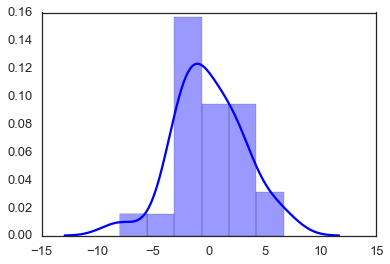



heteroscedasticity?


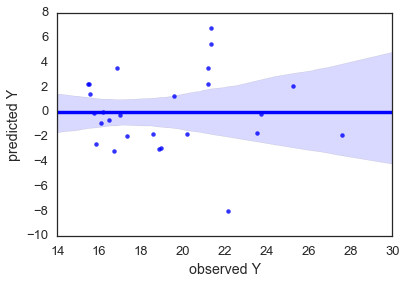


DLN against distance from primary regions


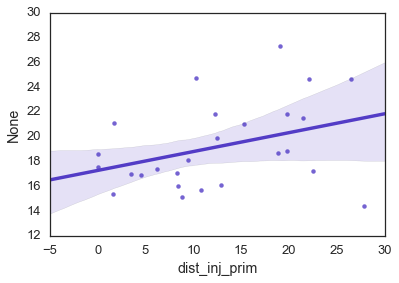

In [26]:
null, full, inc_corrected = full_analysis('incoming', df_r[(df_r['PFC_excluded']==1)])

In [88]:
max_areas = ['DP', '7A', '9_46v', '5']

In [97]:
df_r['max_excluded'] = 1

for i in inc_corrected[inc_corrected > 22].index:
    df_r['max_excluded'].iloc[i] = 0
    
 
for i in df_r.index:
    
    if type(df_r['injection sites'].iloc[i]) is not list:
        df_r['max_excluded'].iloc[i] = 0
        
       


null model
                            OLS Regression Results                            
Dep. Variable:               incoming   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     25.45
Date:                Wed, 09 Aug 2017   Prob (F-statistic):           1.89e-06
Time:                        16:09:46   Log-Likelihood:                -54.172
No. Observations:                  25   AIC:                             114.3
Df Residuals:                      22   BIC:                             118.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      19.0939      3.689     

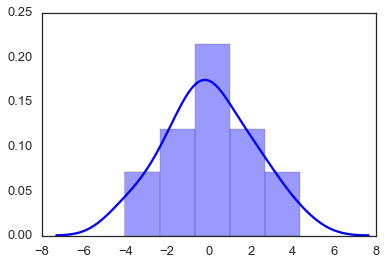



heteroscedasticity?


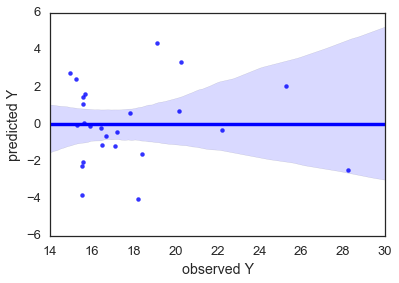


DLN against distance from primary regions


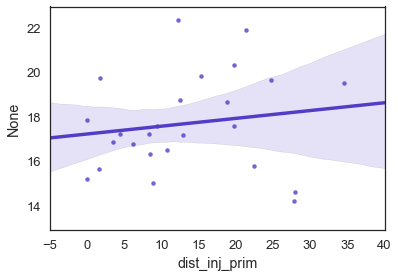

In [107]:
null, full, inc_corrected = full_analysis('incoming', df_r[(df_r['max_excluded']==1)])

In [ ]:
# run full analysis again, this time masing by max_excluded, maybe also by PFC_excluded


null model
                            OLS Regression Results                            
Dep. Variable:               incoming   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     11.31
Date:                Wed, 09 Aug 2017   Prob (F-statistic):           0.000292
Time:                        13:59:10   Log-Likelihood:                -75.632
No. Observations:                  29   AIC:                             157.3
Df Residuals:                      26   BIC:                             161.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      27.3213      4.811     

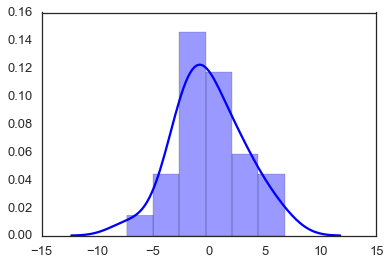



heteroscedasticity?


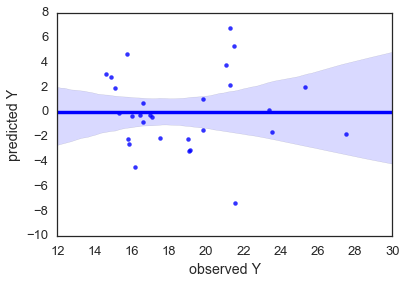


DLN against distance from primary regions


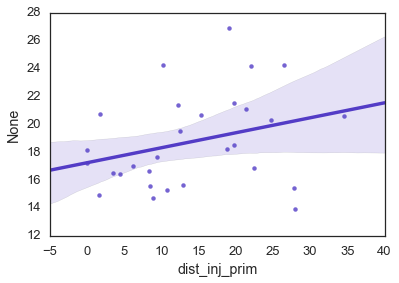

In [48]:
null, full = full_analysis('incoming', df_r)

In [30]:
df_r[df_r['PFC_excluded'] == 1].shape

(26, 27)

In [31]:
df_r.shape

(91, 27)